Carlos Alberto Lopez Alvarez A01168193
Eric Fernández Carbajal A01653071

In [4]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

from sklearn.cluster import KMeans


%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

import matplotlib.colors as colors


In [6]:
df = pd.read_csv(r"Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding="cp1252")
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [7]:
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [8]:
dfCopy = df.copy()
dfCopy

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [9]:
dfCopy = dfCopy.drop(dfCopy.columns[0:10],axis=1)

In [10]:
dfCopy.isnull().sum()

ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L                0
CALIDAD_PB                 0
MN_TOT_mg/L                0
CALIDAD_MN                 0
FE_TOT_mg/L                0
CALIDAD_FE                 0
SEMAFORO                   0
CONTAMINANTES            434
CUMPLE_CON_ALC             0
CUMPLE_CON_COND            0
CUMPLE_CON_SDT

In [11]:
dfCopy = dfCopy.drop(dfCopy.columns[4],axis=1)

In [12]:
dfCopy.isnull().sum()

ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN                0
FE_TOT_mg/L               0
CALIDAD_FE                0
SEMAFORO                  0
CONTAMINANTES           434
CUMPLE_CON_ALC            0
CUMPLE_CON_COND           0
CUMPLE_CON_SDT_ra         0
CUMPLE_CON_SDT_salin      0
CUMPLE_CON_FLUO     

In [13]:
dfCopy = dfCopy.drop(dfCopy.columns[30],axis=1)

In [14]:
dfCopy.isnull().sum()

ALC_mg/L                4
CALIDAD_ALC             4
CONDUCT_mS/cm           6
CALIDAD_CONDUC          6
SDT_M_mg/L              2
CALIDAD_SDT_ra          2
CALIDAD_SDT_salin       2
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                1
CALIDAD_DUR             1
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              1
CALIDAD_N_NO3           1
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_A

In [15]:
dfCopy = dfCopy.fillna(0)

In [39]:
dfCopy.head()

,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [37]:
dfCopy.describe()

,ALC_mg/L,CONDUCT_mS/cm
count,1068.000000,1068.000000
mean,234.751236,1132.554401
std,117.540461,1244.973242
min,0.000000,0.000000
25%,163.170000,499.000000
50%,215.170000,810.500000
75%,292.423750,1321.250000
max,1650.000000,18577.000000


In [43]:
matrix = df.corr()
print(matrix)

               LONGITUD   LATITUD  PERIODO  ALC_mg/L  CONDUCT_mS/cm  SDT_mg/L
LONGITUD       1.000000 -0.760204      NaN  0.167234       0.061118       NaN
LATITUD       -0.760204  1.000000      NaN -0.080026       0.053786       NaN
PERIODO             NaN       NaN      NaN       NaN            NaN       NaN
ALC_mg/L       0.167234 -0.080026      NaN  1.000000       0.232003       NaN
CONDUCT_mS/cm  0.061118  0.053786      NaN  0.232003       1.000000       NaN
SDT_mg/L            NaN       NaN      NaN       NaN            NaN       NaN


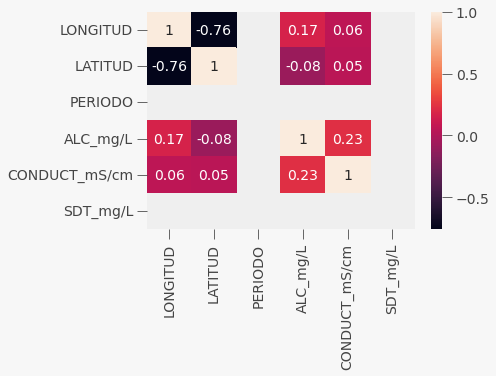

In [44]:
import seaborn as sns

matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

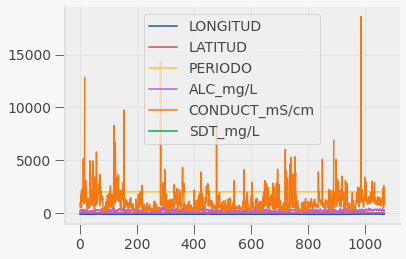

In [45]:
df_plot = df.plot()

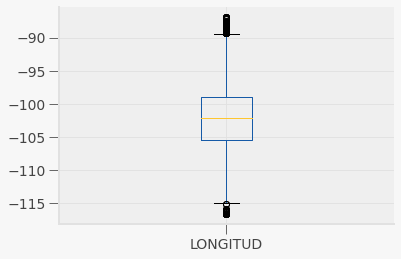

In [46]:
df_plot = df.boxplot(column=["LONGITUD"])

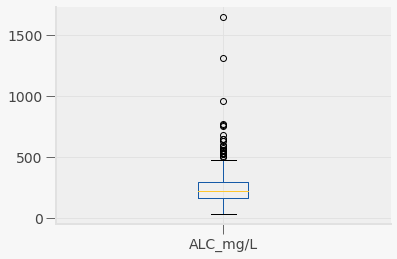

In [47]:
df_plot = df.boxplot(column=["ALC_mg/L"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [18]:
latlong=df[["LATITUD","LONGITUD"]]

In [19]:
latlong.describe()

,LATITUD,LONGITUD
count,1068.000000,1068.000000
mean,23.163618,-101.891007
std,3.887670,6.703263
min,14.561150,-116.664250
25%,20.212055,-105.388865
50%,22.617190,-102.174180
75%,25.510285,-98.974716
max,32.677713,-86.864120


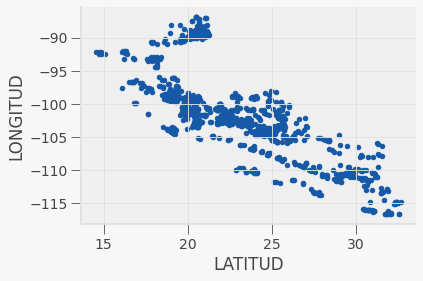

In [20]:
#extrae los datos interesantes
latlong.plot.scatter( "LATITUD","LONGITUD")

In [21]:
latlong["Coordinates"] = list(zip(latlong.LONGITUD, latlong.LATITUD))
latlong["Coordinates"] = latlong["Coordinates"].apply(Point)
latlong.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LATITUD,LONGITUD,Coordinates
0,22.20887,-102.02210,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.2448 23.45138)


In [22]:
gdf = gpd.GeoDataFrame(latlong, geometry="Coordinates")
gdf.head()

,LATITUD,LONGITUD,Coordinates
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)


In [23]:
df["SEMAFORO"]

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1068, dtype: object

In [24]:
column=df["SEMAFORO"]
column.replace('Verde', None)

0       Verde
1       Verde
2        Rojo
3        Rojo
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066     Rojo
1067     Rojo
Name: SEMAFORO, Length: 1068, dtype: object

In [25]:
type(column)

pandas.core.series.Series

In [26]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [27]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

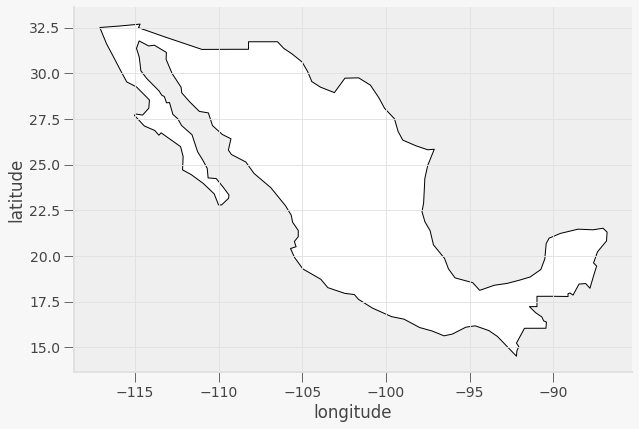

In [28]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'mex'
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

In [29]:


kmeans = KMeans(n_clusters = 4, init ='k-means++') #pedimos 4 clusters
# clusterizamos, entreanndo el kmeans 
kmeans.fit(latlong[latlong.columns[0:2]])
# ahora guardamos los resultados
labels = kmeans.labels_
labels

array([0, 0, 3, ..., 3, 3, 3], dtype=int32)

In [30]:
X = df[["LONGITUD","LATITUD"]]

kmeans = KMeans(n_clusters=4).fit(X) #entrenamos al kmeans
centroids = kmeans.cluster_centers_ # Los cdentroides son los centros de cada kmean
labels = kmeans.predict(X) #  datos 
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C) #Hacemos un dataframe 
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #Aqui creamos los puntos coordenadas a partir del datagrame


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates") #Geopandas
gdf_C


,0,1,Coordinates
0,-100.217513,20.250758,POINT (-100.21751 20.25076)
1,-111.445371,28.734017,POINT (-111.44537 28.73402)
2,-90.092716,19.650263,POINT (-90.09272 19.65026)
3,-103.657544,24.758978,POINT (-103.65754 24.75898)


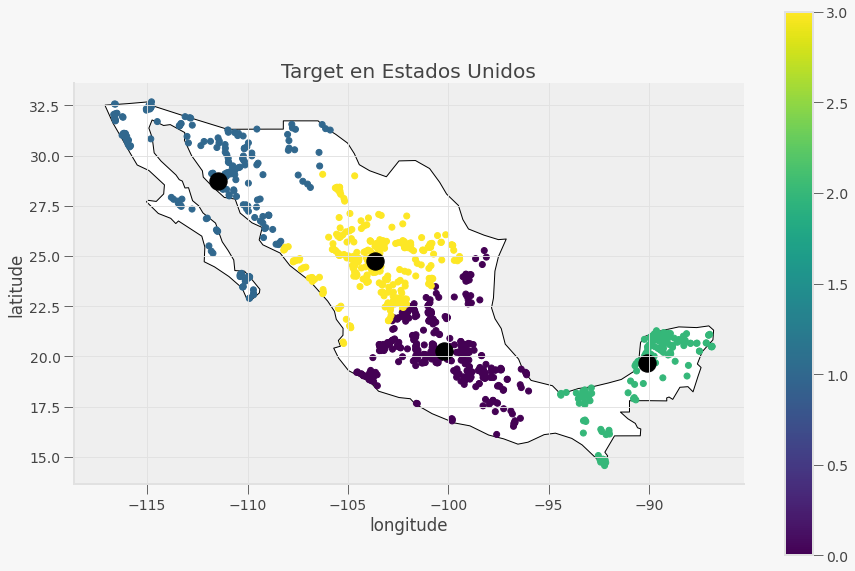

In [31]:
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de los unites

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.


color_dict = {'Amarillo':'orange', 'Verde':'red','Rojo':'green'}
gdf.plot(ax=gax, alpha = 1, column= labels, legend=True) #Aqui grafica los datos originales
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 300) #Aqui grafica los datos de nuestro dataset de arriba

#De aqui para abajo es puro ploting busines
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

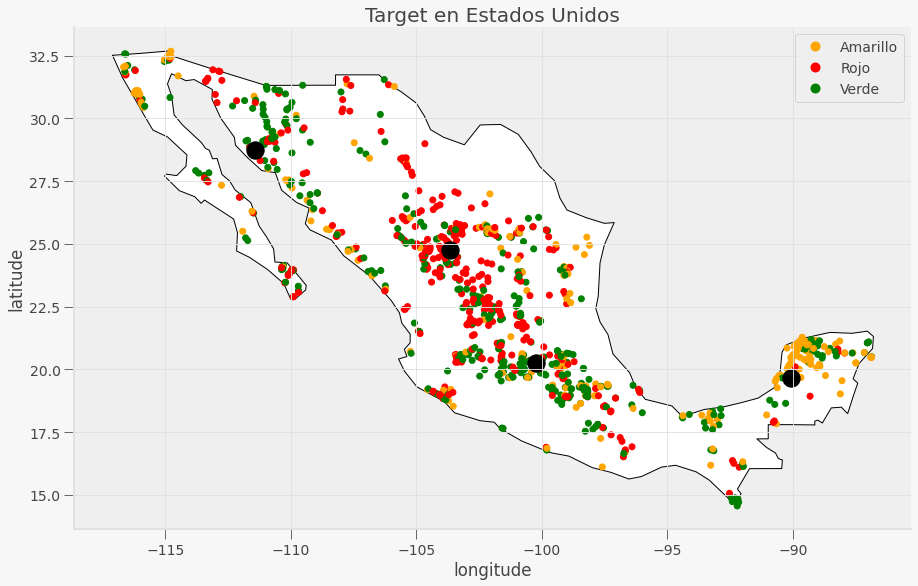

In [32]:
fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de mex


color_dict = {'Amarillo':'orange', 'Verde':'red','Rojo':'green'}
gdf.plot(ax=gax, alpha = 1, column=df["SEMAFORO"], legend=True, cmap=colors.ListedColormap(list(color_dict.values()))) #Aqui grafica los datos originales
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 300) #Aqui grafica 

#De aqui para abajo es puro ploting
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [33]:
labels.shape

(1068,)